## Non-Traffic citations
### By Abigail Huang
I'm measuring safety by looking at non-traffic citations such as disorderly conduct, public drunkenness, noise violations, etc. The **fewer** citations the neighborhood has, the **safer** the neighborhood is! I chose this metric because police citations are a major contribuitor to whether 


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
citations = pd.read_csv("../data/non_traffic_citations.csv")
citations.head()

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,2,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,3,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,4,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,5,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403


In [9]:
print("Total Citations:", len(citations))
print("Neighborhoods Covered:", citations['NEIGHBORHOOD'].nunique())

Total Citations: 16295
Neighborhoods Covered: 97


In [11]:
citations_clean = citations[['NEIGHBORHOOD', 'OFFENSES', 'CITEDTIME']]
print(citations_clean['OFFENSES'].value_counts().head(10))

OFFENSES
5505 Public Drunkenness                                                                      3162
2709(a)(1) Harassment by Physical Contact, or Attempts or Threats                            1561
5503(a)(1) DISORDERLY CONDUCT - ENGAGE IN FIGHTING                                           1340
627.02(b)(i) Possessing a small amount of marijuana                                          1329
601.16(b)(1)(a) Any Person who urinates or defecates in, on, or about any public place       1319
5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF                                           700
5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE                                            685
601.08(a) Alcohol or Liquor Consumption on Streets or Sidewalks                               558
3304(a)(5) CRIMINAL MISCHIEF - Intentionally Damages Real Or Personal Property Of Another     515
6308(a) Underage Purchase, Consume, Possessed or Transport Liquor                             427
Name: count

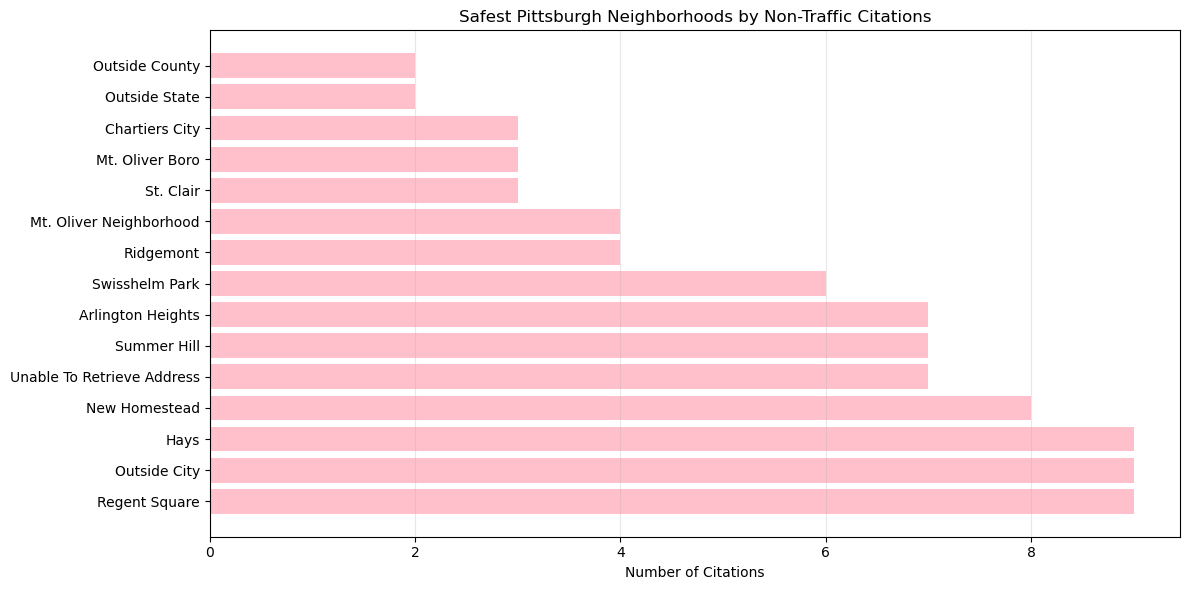

Top 15 Safest Neighborhoods:
1. Outside County: 2 citations
2. Outside State: 2 citations
3. Chartiers City: 3 citations
4. Mt. Oliver Boro: 3 citations
5. St. Clair: 3 citations
6. Mt. Oliver Neighborhood: 4 citations
7. Ridgemont: 4 citations
8. Swisshelm Park: 6 citations
9. Arlington Heights: 7 citations
10. Summer Hill: 7 citations
11. Unable To Retrieve Address: 7 citations
12. New Homestead: 8 citations
13. Hays: 9 citations
14. Outside City: 9 citations
15. Regent Square: 9 citations


In [23]:
top_15_safest = citations_per_neighborhood.nsmallest(15, 'citation_count')

plt.figure(figsize=(12, 6))
plt.barh(top_15_safest['NEIGHBORHOOD'], top_15_safest['citation_count'], color='pink')
plt.xlabel('Number of Citations')
plt.title('Safest Pittsburgh Neighborhoods by Non-Traffic Citations')
plt.gca().invert_yaxis() 
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 15 Safest Neighborhoods:")
for i, (idx, row) in enumerate(top_15_safest.iterrows(), 1):
    print(f"{i}. {row['NEIGHBORHOOD']}: {row['citation_count']} citations")

## Conclusion
According to my data, I have three neighborhoods that tie for the safest neighborhoods: **Chartiers City, Mt. Oliver Boro, and St. Clair.** Based on the data found and shown in my graph, these three neighborhoods have only had 3 non-traffic citations in the past 9 years. This represents an exceptionally low level of disorderly conduct, noise complaints, and other non-traffic offenses over the years. 

**Limitations & Considerations:**
I didn't have population data per neighborhood, so I wasn't able to calculate per-capita rates. Additionally, the dataset used doesn't cover non-reported incidents.